# Pandas

In [1]:
import pandas as pd

## Reading market data for SNAP

In [3]:
data = pd.read_csv("../dataset/snap.csv")
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,Aug 20 2018,11.80,11.86,11.57,11.73,11.73,13977800
1,Aug 17 2018,12.16,12.17,11.63,11.89,11.89,22444600
2,Aug 16 2018,12.30,12.58,12.10,12.17,12.17,14652900


In [4]:
print(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,12.951100,13.203800,12.680800,12.928400,12.928400,2.444593e+07
std,1.429399,1.447525,1.339162,1.380316,1.380316,1.902549e+07
min,10.560000,10.680000,10.500000,10.550000,10.550000,8.219500e+06
25%,12.147500,12.375000,11.925000,12.177500,12.177500,1.372595e+07
50%,13.085000,13.360000,12.875000,13.135000,13.135000,1.875875e+07
75%,13.712500,14.147500,13.622500,13.907500,13.907500,2.871392e+07
max,15.940000,16.120000,15.650000,15.870000,15.870000,1.592094e+08


In [7]:
import numpy as np
data = data.replace(r'-', np.nan, regex=True)
data["Low"] = pd.to_numeric(data["Low"])
data["Open"] = pd.to_numeric(data["Open"])


In [10]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [9]:
# https://numpy.org/doc/stable/reference/arrays.datetime.html
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
data["Date"] = pd.to_datetime(data["Date"], format="%b %d %Y")

In [11]:
data = data.dropna()

In [12]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,12.951100,13.203800,12.680800,12.928400,12.928400,2.444593e+07
std,1.429399,1.447525,1.339162,1.380316,1.380316,1.902549e+07
min,10.560000,10.680000,10.500000,10.550000,10.550000,8.219500e+06
25%,12.147500,12.375000,11.925000,12.177500,12.177500,1.372595e+07
50%,13.085000,13.360000,12.875000,13.135000,13.135000,1.875875e+07
75%,13.712500,14.147500,13.622500,13.907500,13.907500,2.871392e+07
max,15.940000,16.120000,15.650000,15.870000,15.870000,1.592094e+08


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt


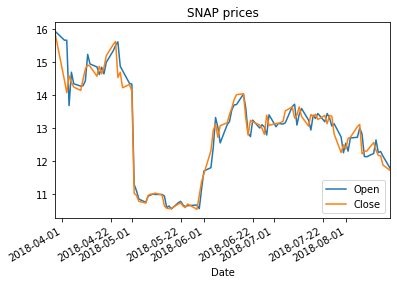

In [24]:
data = data.set_index('Date')
plt.figure()
data.Open.plot()
data.Close.plot()
plt.title("SNAP prices")
plt.legend(loc='lower right')

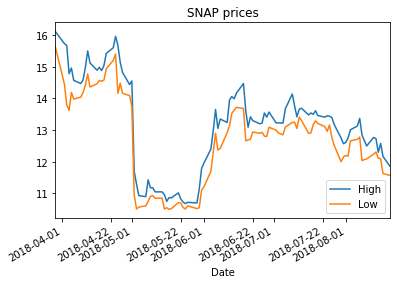

In [25]:

data.High.plot()
data.Low.plot()
plt.title("SNAP prices")
plt.legend(loc='lower right')

No handles with labels found to put in legend.


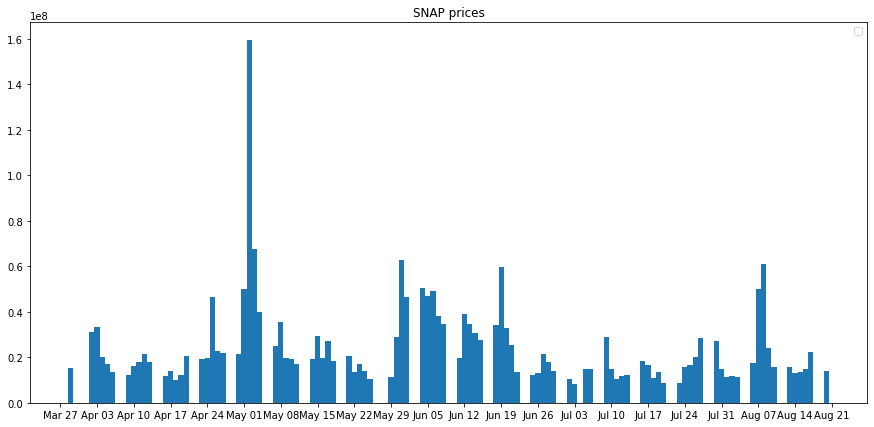

In [29]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(data.index, data['Volume'], width=1)

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#format date
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_title("SNAP prices")
ax.legend(loc='upper right')


### How many data points per month

In [33]:
data.groupby(data.index.strftime('%Y%m')).count()

,Open,High,Low,Close,Adj Close,Volume
201803,1,1,1,1,1,1
201804,21,21,21,21,21,21
201805,22,22,22,22,22,22
201806,21,21,21,21,21,21
201807,21,21,21,21,21,21
201808,14,14,14,14,14,14


In [35]:
data.resample('MS').count()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-01,1,1,1,1,1,1
2018-04-01,21,21,21,21,21,21
2018-05-01,22,22,22,22,22,22
2018-06-01,21,21,21,21,21,21
2018-07-01,21,21,21,21,21,21
2018-08-01,14,14,14,14,14,14


In [34]:
weekly = data.resample('W').mean()
weekly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-01,15.9400,16.1200,15.6500,15.870,15.870,15434500
2018-04-08,14.8160,15.1420,14.0080,14.354,14.354,22961100
2018-04-15,14.6400,14.9300,14.3540,14.646,14.646,17124820
2018-04-22,14.7980,15.0420,14.6180,14.830,14.830,13707440
2018-04-29,15.2220,15.4380,14.6800,14.928,14.928,26003800
2018-05-06,12.3940,12.5840,11.9760,12.250,12.250,67631820
2018-05-13,10.9400,11.1480,10.8100,10.954,10.954,23227140
2018-05-20,10.7520,10.8980,10.5860,10.672,10.672,22730200
2018-05-27,10.7020,10.7960,10.6180,10.682,10.682,15055920


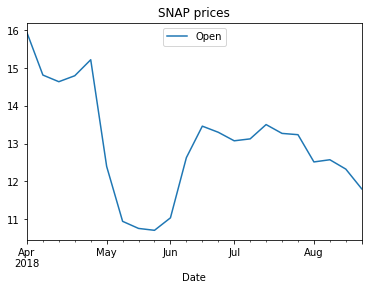

In [36]:
weekly.Open.plot()
plt.title("SNAP prices")
plt.legend(loc='upper center')

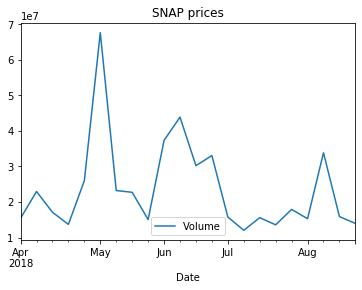

In [37]:
weekly.Volume.plot()
plt.title("SNAP prices")
plt.legend(loc='lower center')

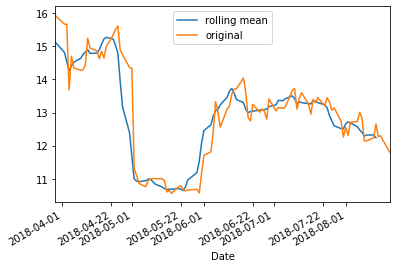

In [38]:
data.Open.rolling(window=5,center=False).mean().plot()
data.Open.plot()
plt.legend(['rolling mean', 'original'], loc='upper center')

### Growth of a stock

             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2018-03-29  15.94  16.12  15.65  15.87      15.87  15434500
2018-04-02  15.67  15.73  14.45  14.46      14.46  30892600
2018-04-03  15.67  15.67  13.80  14.08      14.08  33231800
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2018-03-29       NaN       NaN       NaN       NaN        NaN       NaN
2018-04-02 -0.017084 -0.024491 -0.079777 -0.093044  -0.093044  0.693911
2018-04-03  0.000000 -0.003822 -0.046026 -0.026631  -0.026631  0.072991


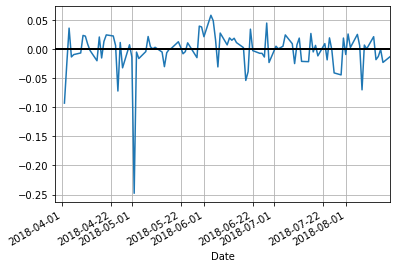

In [41]:
data = data.sort_index(ascending=True)
print (data.head(3))
stock_change = data.apply(lambda x: np.log(x) - np.log(x.shift(1)))
print (stock_change.head(3))
stock_change.Close.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

## Reading Fama French factors

- Monthly data starts 1963-07
- Skip the first 3 rows
- Number of lines to read = months(Todays date - 1963-07-31)



In [60]:
import datetime as dt
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month
nrows = diff_month(dt.date.today(), dt.date(1963, 7, 1))
df = pd.read_csv('https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_CSV.zip',
           compression='zip', skiprows=[0,1,2], nrows=nrows-1, index_col=0)
df.index = pd.to_datetime(df.index.astype('str') , format='%Y%m') + pd.offsets.MonthEnd()

In [61]:
df.tail()

,Mkt-RF,SMB,HML,RMW,CMA,RF
2019-12-31,2.77,0.96,1.83,0.21,1.31,0.14
2020-01-31,-0.11,-4.40,-6.27,-1.23,-2.34,0.13
2020-02-29,-8.13,-0.07,-4.01,-1.64,-2.53,0.12
2020-03-31,-13.39,-8.45,-14.12,-1.33,1.22,0.12
2020-04-30,13.65,2.83,-1.25,2.59,-1.08,0.00


In [64]:
#!pip install pyarrow
df.to_parquet('F-F_Research_Data_5_Factors_Monthly.parquet', engine='pyarrow', index=True) 

In [65]:
pd.read_parquet('F-F_Research_Data_5_Factors_Monthly.parquet')

,Mkt-RF,SMB,HML,RMW,CMA,RF
1963-07-31,-0.39,-0.47,-0.83,0.66,-1.15,0.27
1963-08-31,5.07,-0.79,1.67,0.40,-0.40,0.25
1963-09-30,-1.57,-0.48,0.18,-0.76,0.24,0.27
1963-10-31,2.53,-1.29,-0.10,2.75,-2.24,0.29
1963-11-30,-0.85,-0.84,1.71,-0.45,2.22,0.27
...,...,...,...,...,...,...
2019-12-31,2.77,0.96,1.83,0.21,1.31,0.14
2020-01-31,-0.11,-4.40,-6.27,-1.23,-2.34,0.13
2020-02-29,-8.13,-0.07,-4.01,-1.64,-2.53,0.12
2020-03-31,-13.39,-8.45,-14.12,-1.33,1.22,0.12


In [69]:
wti = pd.read_json('https://datahub.io/core/oil-prices/r/wti-daily.json')
brent = pd.read_json('https://datahub.io/core/oil-prices/r/brent-daily.json')
wti.set_index('Date', inplace=True)
brent.set_index('Date', inplace=True)
wti.columns=['WTI']
brent.columns=['Brent']
crude = wti.join(brent, how='outer').ffill()

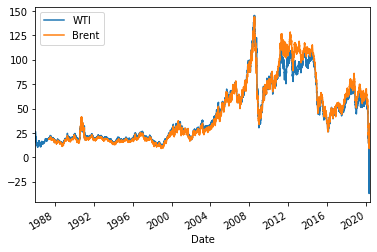

In [75]:
crude.plot()

In [76]:
crude.to_json('Crude_oil_prices.json')

In [77]:
fncl = pd.read_json('https://datahub.io/core/s-and-p-500-companies-financials/r/constituents-financials.json')
cots = pd.read_json('https://datahub.io/core/s-and-p-500-companies-financials/r/constituents.json')

In [78]:
fncl.tail()

,52 Week High,52 Week Low,Dividend Yield,EBITDA,Earnings/Share,Market Cap,Name,Price,Price/Book,Price/Earnings,Price/Sales,SEC Filings,Sector,Symbol
500,46.86,76.81,1.170079,7.220000e+08,1.83,12915021000,Xylem Inc.,70.24,5.31,30.94,2.726209,http://www.sec.gov/cgi-bin/browse-edgar?action...,Industrials,XYL
501,62.85,86.93,1.797080,2.289000e+09,4.07,27003303098,Yum! Brands Inc,76.30,212.08,27.25,6.313636,http://www.sec.gov/cgi-bin/browse-edgar?action...,Consumer Discretionary,YUM
502,108.17,133.49,0.794834,2.007400e+09,9.01,24454698119,Zimmer Biomet Holdings,115.53,2.39,14.32,3.164895,http://www.sec.gov/cgi-bin/browse-edgar?action...,Health Care,ZBH
503,38.43,55.61,1.480933,0.000000e+00,2.60,10670678640,Zions Bancorp,50.71,1.42,17.73,3.794579,http://www.sec.gov/cgi-bin/browse-edgar?action...,Financials,ZION
504,52.00,80.13,0.682372,1.734000e+09,1.65,35991109776,Zoetis,71.51,18.09,32.80,9.280896,http://www.sec.gov/cgi-bin/browse-edgar?action...,Health Care,ZTS


In [79]:
cots.tail()

,Name,Sector,Symbol
500,Xylem Inc.,Industrials,XYL
501,Yum! Brands Inc,Consumer Discretionary,YUM
502,Zimmer Biomet Holdings,Health Care,ZBH
503,Zions Bancorp,Financials,ZION
504,Zoetis,Health Care,ZTS


In [80]:
fncl.shape

(505, 14)

In [81]:
cots.shape

(505, 3)

In [ ]:
fncl.merge(cots, how='inner', on='Symbol')

In [82]:
co2 = pd.read_csv('https://datahub.io/core/co2-fossil-by-nation/r/fossil-fuel-co2-emissions-by-nation.csv')

In [83]:
co2.tail()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
17227,2014,VIET NAM,45517,19246,12694,5349,8229,0,0.49,761
17228,2014,WALLIS AND FUTUNA ISLANDS,6,0,6,0,0,0,0.44,1
17229,2014,YEMEN,6190,137,5090,581,381,0,0.24,153
17230,2014,ZAMBIA,1228,132,797,0,299,0,0.08,33
17231,2014,ZIMBABWE,3278,2097,1005,0,177,0,0.22,9


In [84]:
co2.pivot_table(index='Year', columns='Country', values='Total')

Country,AFGHANISTAN,ALBANIA,ALGERIA,ANDORRA,ANGOLA,ANGUILLA,ANTARCTIC FISHERIES,ANTIGUA & BARBUDA,ARGENTINA,ARMENIA,...,VANUATU,VENEZUELA,VIET NAM,WALLIS AND FUTUNA ISLANDS,YEMEN,YUGOSLAVIA (FORMER SOCIALIST FEDERAL REPUBLIC),YUGOSLAVIA (MONTENEGRO & SERBIA),ZAMBIA,ZANZIBAR,ZIMBABWE
Year,,,,,,,,,,,,,,,,,,,,,
1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,2308.0,1254.0,32500.0,141.0,7924.0,41.0,NaN,143.0,51246.0,1150.0,...,33.0,51560.0,38925.0,8.0,6390.0,NaN,NaN,734.0,NaN,2121.0
2011,3338.0,1429.0,33048.0,134.0,8274.0,39.0,NaN,140.0,52259.0,1341.0,...,36.0,48220.0,41497.0,7.0,5363.0,NaN,NaN,801.0,NaN,2608.0
2012,2933.0,1339.0,35448.0,133.0,9108.0,39.0,NaN,143.0,52456.0,1553.0,...,31.0,54204.0,38784.0,7.0,5091.0,NaN,NaN,1000.0,NaN,2125.0


In [ ]:
# https://co2.jpl.nasa.gov/#mission=OCO-2